In [10]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [11]:
df = pd.read_csv('cleaned_movies.csv')


# Simple Resampling - Random Oversampling

In [12]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['genres', 'original_language', 'popularity_class', 'popularity']).copy()
y = df['popularity_class']

# should we add differt binding for oversampling?
# in this type of resampling we need numeric feature I added the mean value, but maybe for different algorithm just adding nr index instead of for example genres will be better?

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([X_resampled.reset_index(drop=True),
                          pd.Series(y_resampled, name='popularity_class')], axis=1)

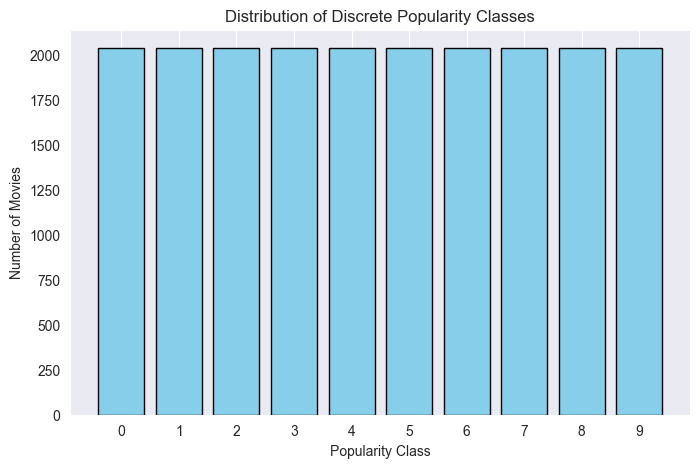

In [13]:
import matplotlib.pyplot as plt

class_counts = df_resampled['popularity_class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Discrete Popularity Classes')
plt.xlabel('Popularity Class')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.savefig('histogram_popularity_simply_resampling_discrete.png')
plt.show()  

In [14]:
X = df_resampled.drop(columns=['popularity_class']).copy()
y = df_resampled['popularity_class']

print(X.dtypes)

budget            int64
runtime         float64
vote_average    float64
vote_count        int64
revenue           int64
release_year      int64
genres_score    float64
dtype: object


# SVM

In [15]:
from sklearn.svm import SVC

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")


Fold 1 - Acc: 0.6547 | Prec: 0.6647 | Rec: 0.6529 | F1: 0.6571
Fold 2 - Acc: 0.6476 | Prec: 0.6602 | Rec: 0.6488 | F1: 0.6526
Fold 3 - Acc: 0.6518 | Prec: 0.6619 | Rec: 0.6548 | F1: 0.6546
Fold 4 - Acc: 0.6564 | Prec: 0.6619 | Rec: 0.6569 | F1: 0.6576
Fold 5 - Acc: 0.6599 | Prec: 0.6632 | Rec: 0.6575 | F1: 0.6585

--- Summary ---
Mean Accuracy: 0.6541
Mean Precision: 0.6624
Mean Recall: 0.6542
Mean F1-score: 0.6561


In [16]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_SVC.csv", index=False)

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.8861 | Prec: 0.8846 | Rec: 0.8865 | F1: 0.8851
Fold 2 - Acc: 0.8870 | Prec: 0.8852 | Rec: 0.8878 | F1: 0.8863
Fold 3 - Acc: 0.8905 | Prec: 0.8863 | Rec: 0.8884 | F1: 0.8870
Fold 4 - Acc: 0.8826 | Prec: 0.8803 | Rec: 0.8845 | F1: 0.8820
Fold 5 - Acc: 0.8932 | Prec: 0.8913 | Rec: 0.8930 | F1: 0.8918

--- Summary ---
Mean Accuracy: 0.8879
Mean Precision: 0.8855
Mean Recall: 0.8880
Mean F1-score: 0.8864


In [18]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_KNN.csv", index=False)

# DECISION TREE

In [23]:
from sklearn.tree import DecisionTreeClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('tree', DecisionTreeClassifier(random_state=42))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)


# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.9730 | Prec: 0.9730 | Rec: 0.9732 | F1: 0.9730
Fold 2 - Acc: 0.9774 | Prec: 0.9781 | Rec: 0.9773 | F1: 0.9773
Fold 3 - Acc: 0.9742 | Prec: 0.9736 | Rec: 0.9734 | F1: 0.9735
Fold 4 - Acc: 0.9767 | Prec: 0.9770 | Rec: 0.9771 | F1: 0.9770
Fold 5 - Acc: 0.9725 | Prec: 0.9726 | Rec: 0.9727 | F1: 0.9725

--- Summary ---
Mean Accuracy: 0.9748
Mean Precision: 0.9749
Mean Recall: 0.9747
Mean F1-score: 0.9747


In [24]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_DT.csv", index=False)

# MULTILAYER PERCEPTRON (MLP)

In [21]:
from sklearn.neural_network import MLPClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),     # two hidden layers: 100 and 50 neurons
    activation='relu',                # a commonly used activation function
    solver='adam',                    # modern optimizer, better than 'sgd' in most cases
    learning_rate_init=0.001,         # lower learning rate improves stability
    max_iter=1000,                    # more iterations to allow convergence
    early_stopping=True,              # stops training if validation score doesn't improve
    random_state=42                   # ensures reproducibility
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)


# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.8416 | Prec: 0.8373 | Rec: 0.8410 | F1: 0.8383
Fold 2 - Acc: 0.8738 | Prec: 0.8784 | Rec: 0.8757 | F1: 0.8753
Fold 3 - Acc: 0.8865 | Prec: 0.8865 | Rec: 0.8865 | F1: 0.8856
Fold 4 - Acc: 0.8777 | Prec: 0.8787 | Rec: 0.8793 | F1: 0.8784
Fold 5 - Acc: 0.8848 | Prec: 0.8789 | Rec: 0.8823 | F1: 0.8796

--- Summary ---
Mean Accuracy: 0.8729
Mean Precision: 0.8720
Mean Recall: 0.8730
Mean F1-score: 0.8715


In [22]:
# saving resoults to df
df_results = pd.DataFrame({
    'acc': accuracies,
    'prec': precisions,
    'rec': recalls,
    'f1': f1s
})
df_results.to_csv("2b_classification_simple_resample_MLP.csv", index=False)